## IMPORTING LIBRARIES & Loading the Kaggle dataset

In [1]:
import nltk
import re
import pandas as pd 
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.collocations import *
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer 


pattern = re.compile('^[^a-z]+$')

#Loading the Kaggle 
df = pd.read_csv('resume_dataset.csv', encoding='utf-8')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Loading all the resumes stored in the "Resumes" Directory

In [ ]:
from pyresparser import ResumeParser
from resume_parser import resumeparse
import os
import docx2txt
import requests
import pandas as pd
from pdfminer.high_level import extract_text
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

directory = r'Resumes/'
pdf = []
docs = []
pyresparser = []
resumeparser = []
for filename in os.listdir(directory):
    print(filename)
    data = {}
    if filename.endswith(".docx"):
        path = os.path.join(directory, filename)
        
        data = resumeparse.read_file(path)
        data['text'] = extract_text_from_docx(path)
        
              
        resumeparser.append(data)
        
        data = ResumeParser(path).get_extracted_data()
        data['text'] = extract_text_from_docx(path)
        
        pyresparser.append(data)
        
        
        
    elif filename.endswith(".pdf"):

               
        path = os.path.join(directory, filename)
        
        data = resumeparse.read_file(path)
        data['text'] = extract_text_from_pdf(path)
        
              
        resumeparser.append(data)
        
        data = ResumeParser(path).get_extracted_data()
        data['text'] = extract_text_from_pdf(path)
        
        pyresparser.append(data)

    else:
        continue
    

pyres_df = pd.DataFrame(pyresparser)
pyres_df["processed"] = pyres_df["text"].apply(lambda x:' '.join(steps123(x)))
pyres_df.head()

In [33]:

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("months")
monthstopwords = ["january", "february", "march", "april", "may", "june", "july", 
"august", "september", "octorber", "november", "december"]
stopwords.extend(monthstopwords)
def alpha_filter(w):
  # pattern to match a word of non-alphabetical characters
    if (pattern.match(w)):
        return True
    else:
        return False


## Creating a function for Preprocessing

In [53]:
from nltk.stem import WordNetLemmatizer 
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

def steps123(text):


    tokens = nltk.word_tokenize(text)
    # #Removing stopwords
    stopwords = nltk.corpus.stopwords.words('english') 
    stopwords.append("months")
    monthstopwords = ["january", "february", "march", "april", "may", "june", "july","august", "september", "octorber", "november", "december"]
    stopwords.extend(monthstopwords)
    lemmatizer = WordNetLemmatizer()

    totalResumeWords = set()
    for w in tokens:
        w = lemmatizer.lemmatize(w)
        tagged = nltk.pos_tag([w])

        if w.lower() not in stopwords and not alpha_filter(w):
             if tagged[0][1] in ["NN", "NNS", "NNP","NNPS","JJ"]:
                 totalResumeWords.add(w.lower())
    return list(totalResumeWords)

df["Processed"] = df['Resume'].apply(lambda x: steps123(x))

df.head()

,Category,Resume,Processed
0,Data Science,Skills * Programming Languages: Python (pandas...,"[mining, visualization, technique, vision, mat..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[b4600b146, exprience, india, keras-, github.c..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[b.tech, aeronautics, operating, mr., analytic..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[retail, india, new, anaconda3, building, sent..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[exprience, python-, data, description, educat..."


#### Replacing the categorical labels into 3 major types -> Software ; Non Technical ; Data Science

In [82]:
df.replace({'Category':{"Java Developer":"Software",
"HR":"Non Technical",
"Database":"Data Science",
"Advocate":"Non Technical",
"Testing":"Software",
"Hadoop":"Data Science",
"DevOps Engineer":"Software",
"DotNet Developer":"Software",
"Automation Testing":"Software",
"Arts":"Non Technical",
"SAP Developer":"Software",
"Python Developer":"Software",
"Health and fitness":"Non Technical",
"Business Analyst":"Data Science",
"Civil Engineer":"Non Technical",
"Blockchain":"Software",
"Sales":"Non Technical",
"Mechanical Engineer":"Non Technical",
"Network Security Engineer":"Software",
"ETL Developer":"Software",
"Web Designing":"Software",
"Electrical Engineering":"Non Technical",
"Operations Manager":"Non Technical",
"PMO":"Non Technical"
}},inplace =  True)

In [83]:
df["Category"].value_counts()

Software         74
Non Technical    61
Data Science     34
Name: Category, dtype: int64

In [58]:
df["Processed1"] = df["Processed"].apply(lambda x:' '.join(x))
df.head()

,Category,Resume,Processed,Processed1
0,Data Science,Skills * Programming Languages: Python (pandas...,"[mining, visualization, technique, vision, mat...",mining visualization technique vision matplot ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[b4600b146, exprience, india, keras-, github.c...",b4600b146 exprience india keras- github.com/ra...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[b.tech, aeronautics, operating, mr., analytic...",b.tech aeronautics operating mr. analytics mar...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[retail, india, new, anaconda3, building, sent...",retail india new anaconda3 building sentence k...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[exprience, python-, data, description, educat...",exprience python- data description education s...


Training a Random Forest Classifier Model

In [150]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
# Create a series to store the labels: y
X, y = df.Processed1, df.Category

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords)
X = vectorizer.fit_transform(documents).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 1  1  4]
 [ 0 10  1]
 [ 0  2 15]]
               precision    recall  f1-score   support

 Data Science       1.00      0.17      0.29         6
Non Technical       0.77      0.91      0.83        11
     Software       0.75      0.88      0.81        17

     accuracy                           0.76        34
    macro avg       0.84      0.65      0.64        34
 weighted avg       0.80      0.76      0.73        34

0.7647058823529411


Using the Model to predict the resumes

In [153]:
to_predict = pyres_df["processed"]
testdocuments = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(to_predict)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    testdocuments.append(document)

X = vectorizer.transform(testdocuments).toarray()
X = tfidfconverter.transform(X).toarray()

classifier.predict(X)

array(['Non Technical', 'Non Technical', 'Non Technical'], dtype=object)

Doing PC decomposition & visualizin the data

<Figure size 288x216 with 0 Axes>

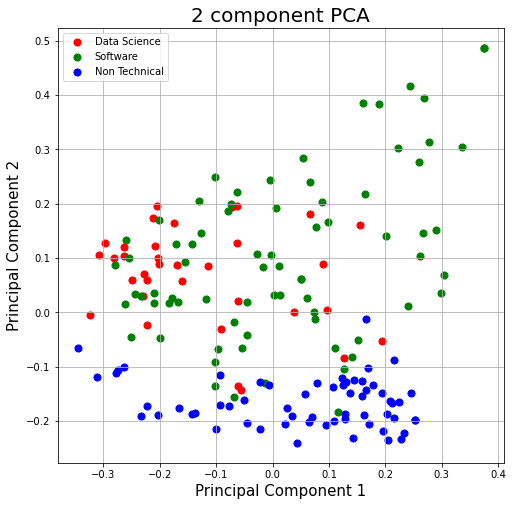

In [156]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

X, y = df.Processed1, df.Category
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords)
X = vectorizer.fit_transform(documents).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()


pca = decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca.fit(X)
X = pca.transform(X)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Data Science', 'Software', 'Non Technical']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['Category'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [146]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import numpy as np
# Create the list of alphaas: alphas
alphas = np.arange(0,1,.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha = alpha)
    # Fit to the training data
    nb_classifier.fit(X_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(X_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8823529411764706

Alpha:  0.1
Score:  0.9411764705882353

Alpha:  0.2
Score:  0.9117647058823529

Alpha:  0.30000000000000004
Score:  0.8823529411764706

Alpha:  0.4
Score:  0.8823529411764706

Alpha:  0.5
Score:  0.8823529411764706

Alpha:  0.6000000000000001
Score:  0.8529411764705882

Alpha:  0.7000000000000001
Score:  0.8529411764705882

Alpha:  0.8
Score:  0.8529411764705882

Alpha:  0.9
Score:  0.8235294117647058

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Going with 0.1 Alpha

In [159]:
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB(alpha = 0.1)
# Fit to the training data
nb_classifier.fit(X_train,y_train)
# Predict the labels: pred
pred = nb_classifier.predict(X_test)
# Compute accuracy: score
score = metrics.accuracy_score(y_test,pred)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
X = vectorizer.transform(testdocuments).toarray()
X = tfidfconverter.transform(X).toarray()

nb_classifier.predict(X)

[[ 5  0  1]
 [ 0 11  0]
 [ 1  0 16]]
               precision    recall  f1-score   support

 Data Science       0.83      0.83      0.83         6
Non Technical       1.00      1.00      1.00        11
     Software       0.94      0.94      0.94        17

     accuracy                           0.94        34
    macro avg       0.92      0.92      0.92        34
 weighted avg       0.94      0.94      0.94        34

0.9411764705882353


array(['Software', 'Software', 'Software'], dtype='<U13')

In [175]:
# Resume Rating system

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count_matrix = count.fit_transform(df['Processed1'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.15848883 0.17480147 ... 0.09915218 0.09109907 0.167001  ]
 [0.15848883 1.         0.16753851 ... 0.06796437 0.12326671 0.09942684]
 [0.17480147 0.16753851 1.         ... 0.07463518 0.20135623 0.17196755]
 ...
 [0.09915218 0.06796437 0.07463518 ... 1.         0.12835901 0.17883195]
 [0.09109907 0.12326671 0.20135623 ... 0.12835901 1.         0.19418131]
 [0.167001   0.09942684 0.17196755 ... 0.17883195 0.19418131 1.        ]]


In [176]:
indices = pd.Series(resumeDS['Category'])
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(resumeDS['Resume'])[i])
        
    return recommended_movies

recommend('Data Science')

['Education Details \r\n B.Tech   Rayat and Bahra Institute of Engineering and BiotechnologyData ScienceData ScienceSkill Details \r\nNumpy- Exprience - Less than 1 year months\r\nMachine Learning- Exprience - Less than 1 year months\r\nTensorflow- Exprience - Less than 1 year months\r\nScikit- Exprience - Less than 1 year months\r\nPython- Exprience - Less than 1 year months\r\nGCP- Exprience - Less than 1 year months\r\nPandas- Exprience - Less than 1 year months\r\nNeural Network- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Wipro\r\ndescription - Bhawana Aggarwal\r\nE-Mail:bhawana.chd@gmail.com\r\nPhone: 09876971076\r\nVVersatile, high-energy professional targeting challenging assignments in Machine\r\nPROFILE SUMMARY\r\nâ\x96ª An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine\r\nLearning, Deep Learning, Data Science, Python, Software Development.\r\nâ\x96ª Skilled in managing end-to-end development and software product

In [169]:
documents[0]

'mining visualization technique vision matplot issue javascript jquery serf dimensionality process analytics build matplotlib fraud customer random extract manager month panda node j elasticsearch counter expression answer neural platform relevant jquery net interactive lawyer monitoring evidence elastic kibana computer various technology mysql language multiple decision docker vader analysis chatbot model organization cassandra identifiable implement regular requirement domain word2vec neutral positive address d3 j exprience deep bot development generate product assist python data ha reduction predictive dc j naã ve llpskill angular system processing solution year understand entire anomaly fraud related associate sqlserver service indicator standard reporting investigative scikit learn flask meta search cluster javascript asks young blob lib push natural information security tool spent recommendation different flow others reservation labor number etc language parse cost option topic g

In [174]:
# build vocabularya and train model
import gensim
model = gensim.models.Word2Vec(
    documents,
    #size=150,
    window=10,
    min_count=2,
    workers=10)
    #iter=10)
model.wv.most_similar(positive = ["security"])

KeyError: "Key 'security' not present"